In [1]:
# RNN 모델을 발전시킨... LSTM 모델
# 문장을 완성하는 인공지능

In [2]:
# !unzip '/content/drive/MyDrive/Colab Notebooks/nyt_commants/nyt_comments.zip' -d '/content/drive/MyDrive/Colab Notebooks/nyt_commants/data'

In [3]:
# 문장.... 바로 다음에 올 단어... 이후의 단어.
# 모델을 반복호출. 단어를 출력
# LSTM 게이트를 이용해 이전 은닉상태를 현재의 입력에 반영

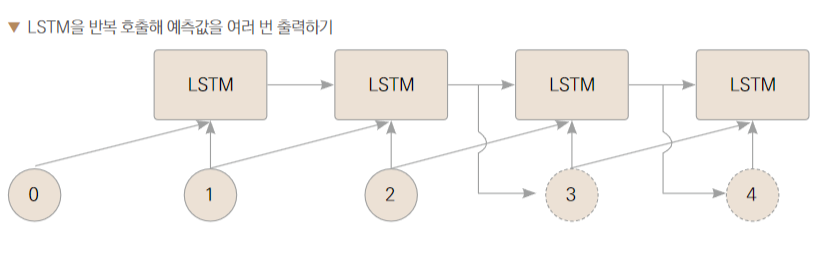

In [4]:
# 비가 ->오면
# 비가, 오면  -> 우산을

# 오면,우산을 ->쓰고
# 우산을,쓰고 -> 나간다

# 비가 오면 우산을 쓰고 나간다

In [5]:
import pandas as pd

In [6]:
# 디렉터리의 데이터 수집
url = '/content/drive/MyDrive/Colab Notebooks/nyt_commants/data/*.csv'
import glob
csv_lists = glob.glob(url)
csv_lists[:]

['/content/drive/MyDrive/Colab Notebooks/nyt_commants/data/ArticlesApril2018.csv',
 '/content/drive/MyDrive/Colab Notebooks/nyt_commants/data/ArticlesApril2017.csv',
 '/content/drive/MyDrive/Colab Notebooks/nyt_commants/data/ArticlesMarch2018.csv',
 '/content/drive/MyDrive/Colab Notebooks/nyt_commants/data/ArticlesFeb2017.csv',
 '/content/drive/MyDrive/Colab Notebooks/nyt_commants/data/ArticlesJan2017.csv',
 '/content/drive/MyDrive/Colab Notebooks/nyt_commants/data/ArticlesJan2018.csv',
 '/content/drive/MyDrive/Colab Notebooks/nyt_commants/data/ArticlesFeb2018.csv',
 '/content/drive/MyDrive/Colab Notebooks/nyt_commants/data/CommentsApril2017.csv',
 '/content/drive/MyDrive/Colab Notebooks/nyt_commants/data/ArticlesMarch2017.csv',
 '/content/drive/MyDrive/Colab Notebooks/nyt_commants/data/ArticlesMay2017.csv',
 '/content/drive/MyDrive/Colab Notebooks/nyt_commants/data/CommentsApril2018.csv',
 '/content/drive/MyDrive/Colab Notebooks/nyt_commants/data/CommentsFeb2017.csv',
 '/content/drive

In [7]:
pd.read_csv(csv_lists[0])['headline'].values.tolist()

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?',
 'Commuter Reprogramming',
 'Unknown',
 'Unknown',
 'Ford Changed Leaders, Looking for a Lift. It’s Still Looking.',
 'Romney Failed to Win at Utah Convention, But Few Believe He’s Doomed',
 'Chain Reaction',
 'He Forced the Vatican to Investigate Sex Abuse. Now He’s Meeting With Pope Francis.',
 'In Berlin, artists find a home',
 'Unknown',
 'The Right Stuff',
 'Jimmy Carter Knows What North Korea Wants',
 'The Truth Is Out There',
 'New Jersey Ruling Could Reignite Battle Over Church-State Separation',
 'Procrastinating',
 'Word + Quiz: dilatory',
 'My Life-Threatening Bout With E. Coli Food Poisoning',
 'Choosing Brexit, a Town Yearned for Its Seafa

In [8]:
# 리스트에 잇는 파일명을 가지고 Articles문장이 잇는 파일명을읽어서 headline 데이터만 추출
all_headlines=[]
for filename in csv_lists:
  if 'Articles' in filename:
    all_headlines.append(pd.read_csv(filename)['headline'].values.tolist())    

In [9]:
import string
def clean_text(text):
  # 모든 단어를 소문자로 변경하고 특수문자를 제거
  return ''.join([i for i in text if i not in string.punctuation]).lower()

# 전처리 : 
all_headlines = [text for text in all_headlines if text != 'Unknown']
clean_lists = [clean_text(text) for text in all_headlines]

# 모든 단어를 분리해서 고유 번호를 지정
bow_dict = {}

for words in clean_lists:
  for word in words.split():
    if word not in bow_dict.keys():
      bow_dict[word] = len(bow_dict.keys())
bow_dict    

{'former': 0,
 'n.f.l.': 1,
 'cheerleaders’': 2,
 'settlement': 3,
 'offer:': 4,
 '$1': 5,
 'and': 6,
 'a': 7,
 'meeting': 8,
 'with': 9,
 'goodelle.p.a.': 10,
 'to': 11,
 'unveil': 12,
 'new': 13,
 'rule.': 14,
 'its': 15,
 'effect:': 16,
 'less': 17,
 'science': 18,
 'in': 19,
 'policymaking.the': 20,
 'noma,': 21,
 'explainedunknownunknownunknownunknownunknownhow': 22,
 'bag': 23,
 'of': 24,
 'texas': 25,
 'dirt': 26,
 'became': 27,
 'times': 28,
 'traditionis': 29,
 'school': 30,
 'place': 31,
 'for': 32,
 'self-expression?commuter': 33,
 'reprogrammingunknownunknownford': 34,
 'changed': 35,
 'leaders,': 36,
 'looking': 37,
 'lift.': 38,
 'it’s': 39,
 'still': 40,
 'looking.romney': 41,
 'failed': 42,
 'win': 43,
 'at': 44,
 'utah': 45,
 'convention,': 46,
 'but': 47,
 'few': 48,
 'believe': 49,
 'he’s': 50,
 'doomedchain': 51,
 'reactionhe': 52,
 'forced': 53,
 'the': 54,
 'vatican': 55,
 'investigate': 56,
 'sex': 57,
 'abuse.': 58,
 'now': 59,
 'pope': 60,
 'francis.in': 61,
 '

In [10]:
# BOW(bag of words)
# 단어를 구분하고 ..사전을 만든다음 고유번호를 부여
# 고유번호를 담고있는 사전을 BOW
# 자연어를 숫자로변경 -> 2개의 단어와 다음에 올 단어를 반환해주도록 데이터셋을 구현

In [11]:
from torch.utils.data.dataset import Dataset

In [12]:
import string
sample = 'dkeif\\dkeidkf!'
''.join([i for i in sample if i not in string.punctuation])

'dkeifdkeidkf'

In [13]:
import glob
import numpy as np
class TextGeneration(Dataset):
  def __init__(self):
    all_headlines = []
    url = '/content/drive/MyDrive/Colab Notebooks/nyt_commants/data/*.csv'
    csv_lists = glob.glob(url)
    for fn in csv_lists:
      if 'Articles' in fn:
        df = pd.read_csv(fn)
        all_headlines.extend(df['headline'].values.tolist())
    all_headlines = [h for h in all_headlines if h != 'Unknown']
    # punctuation 제거
    self.corpus =  [ self.clean_text(h) for h in all_headlines]
    self.BOW = {}
    for line in self.corpus:
      for word in line.split():
        if word not in self.BOW.keys():
          self.BOW[word] = len(self.BOW.keys())
    # 모델의 입력으로 사용할 데이터
    self.data = self.genrate_sequence(self.corpus)  

  # 공백을 기준으로 단어를 분리-> 인접한 두 단어를 입력데이터로, 그 다음에 올 단어를 정답
  def genrate_sequence(self,txt):
    seq = []
    for line in txt:
      line = line.split()
      line_BOW = [ self.BOW[word] for word in line ]
      #단어 2개를 입력으로, 그 다음 단어를 정답
      data = [ ( [line_BOW[i], line_BOW[i+1]], line_BOW[i+2] )   for i in range(len(line_BOW)-2) ]
      seq.extend(data)
      return seq

  def clean_text(self,text):
    # 모든 단어를 소문자로 변경하고 특수문자를 제거
    return ''.join([i for i in text if i not in string.punctuation]).lower()
  def __len__(self):
    return len(self.data)
  def __getitem__(self, index):
    data = np.array(self.data[index][0]) # 입력
    label = np.array(self.data[index][1]).astype(np.float32)
    return data,label

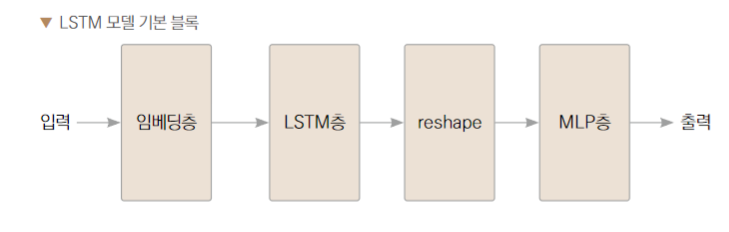

In [14]:
# LSTM모델
import torch.nn as nn
import torch
class LSTM(nn.Module):
  def __init__(self,num_embeddings):
    super(LSTM,self).__init__()
    self.embed = nn.Embedding(num_embeddings=num_embeddings,embedding_dim=16)

    self.lstm = nn.LSTM(
        input_size = 16,
        hidden_size = 64,
        num_layers = 5,
        batch_first = True
    )

    self.fc1 = nn.Linear(128,num_embeddings)
    self.fc2 = nn.Linear(num_embeddings,num_embeddings)
    self.relu = nn.ReLU()
  
  def forward(self,x):
    x = self.embed(x)
    x,_ =  self.lstm(x)
    x = torch.reshape(x, (x.shape[0], -1))
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    return x


In [16]:
# 모델 학습하기
import tqdm
from torch.utils.data.dataloader import DataLoader
from torch.optim.adam import Adam

device = 'cuda' if torch.cuda.is_available() else 'cpu'

dataset = TextGeneration()
model = LSTM(num_embeddings=len(dataset.BOW)).to(device)  
loader = DataLoader(dataset, batch_size=64)
optim = Adam(model.parameters(), lr = 1e-3)

for epoch in range(200):
  iterator = tqdm.tqdm(loader)
  for data, label in iterator:
    optim.zero_grad()
    pred = model(torch.tensor(data, dtype=torch.long).to(device))
    loss = nn.CrossEntropyLoss()(pred, torch.tensor(label, dtype = torch.long).to(device))
    # loss = nn.CrossEntropyLoss()(pred, torch.tensor(label.clone().detach(), dtype = torch.long).to(device))
    loss.backward()
    optim.step()
    iterator.set_description(f"epoch:{epoch} loss:{loss.item()}")
torch.save(model.state_dict(), 'lstm.pth')

  0%|          | 0/1 [00:00<?, ?it/s]<ipython-input-16-6da76616a91b>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = model(torch.tensor(data, dtype=torch.long).to(device))
<ipython-input-16-6da76616a91b>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = nn.CrossEntropyLoss()(pred, torch.tensor(label, dtype = torch.long).to(device))
epoch:199 loss:0.0004410365945659578: 100%|██████████| 1/1 [00:00<00:00, 15.19it/s]


In [27]:
# 평가
def generate(model, BOW, string = 'i love', strlen = 10):
  device = 'cuda' if torch.cuda.is_available() else 'cpu'
  string = input("input string")
  with torch.no_grad():
    for p in range(strlen):
      # 입력문장을 텐서로 변경
      words = torch.tensor(
          [ BOW[w] for w in string.split() ],dtype=torch.long
      ).to(device)
      # 입력으로 사용 - 배치차원 추가
      input_tensor = torch.unsqueeze(words[-2:], dim=0)
      output = model(input_tensor)
      output_word = (torch.argmax(output).cpu().numpy())
      # 문장에 예측된 단어를 추가 문장완성
      string += " "
      string += list(BOW.keys())[output_word]      
  print(f"predicted sentence : {string}")

model.load_state_dict(torch.load("lstm.pth", map_location=device))
pred = generate(model,dataset.BOW)

input stringfinding an
predicted sentence : finding an cheerleaders’ cheerleaders’ meeting meeting settlement goodell 1 cheerleaders’ a meeting
